In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta 
import os
import datetime
import json
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbtpro as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from bband import get_data,Strategy
# plt.style.use('seaborn')
df_dict = {}

In [3]:
df_dict = {}
candidate = ['ETH','BTC','BNB','SOL','MATIC',
               'XRP','DYDX','AVAX','LINK','GAS',
               'DOGE','ORDI','TRB','WLD','ADA',
               'OP','FIL','ZRX','LTC','RUNE','ATOM',
               'ARB','GMT','ETC','ARK','BCH','DOT',
               'LDO','SUI','GALA','CAKE',
               'APE','INJ','FTM','APT','YFI','OMG',
               'SEI','EOS','1000SHIB','NEAR',
               'MKR','CYBER','UNI',
               'BLUR','SUSHI','WAVES','MASK','MANA',
               'EGLD','AAVE','NEO','FET','TRX','GRT','ALGO','STX','XLM']
for coin in candidate:
    df_dict[coin] = pd.read_hdf(f'/Users/johnsonhsiao/Desktop/data/{coin}USDT_PERPETUAL.h5')

APY: 122.31 %
MDD: 15.12 %
MDD Duration 158 days 00:00:00
worst trade: -5.37 %
2022-03-29 02:00:00 ~ 2022-03-29 04:00:00
avg holding days: 0.22 days
--------------------------------------------
PF: 1.66
Sharpe Ratio: 3.00
Calmar Ratio: 5.85
Sortino Ratio: 5.06
Omega Ratio: 1.29
--------------------------------------------
Expectancy : 0.41 %
Total Time Exposure : 18.24 %
Total Trades: 567
Win Rate: 33.86 %
--------------------------------------------
PF * Win Rate: 0.562


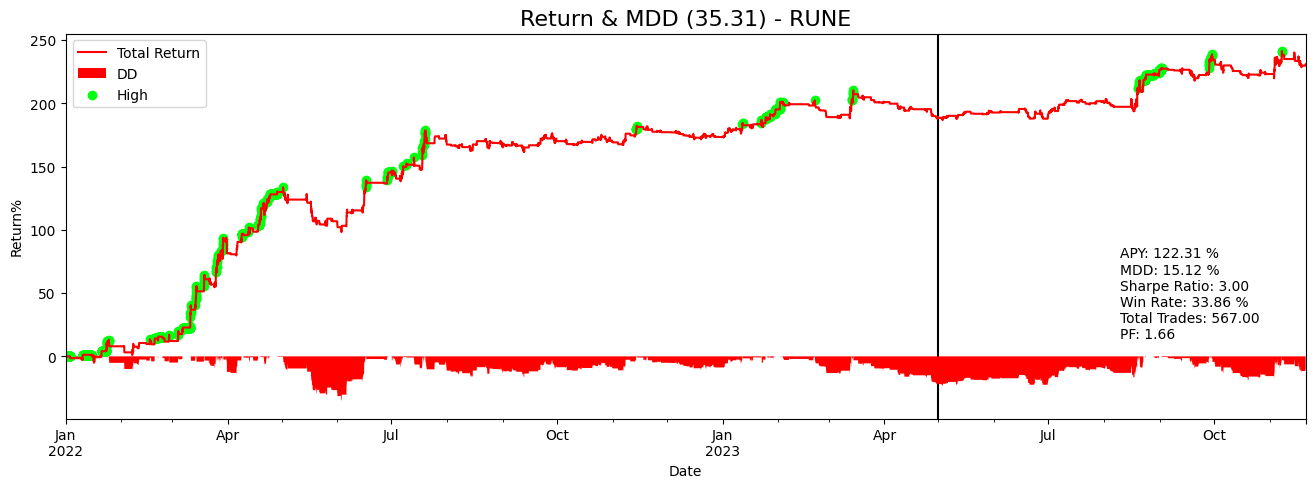

(None,
 Start                               2022-01-01 00:00:00
 End                                 2023-11-21 01:00:00
 Period                                689 days 02:00:00
 Start Value                                     10000.0
 Min Value                                   9498.222285
 Max Value                                  34139.449478
 End Value                                  33087.374663
 Total Return [%]                             230.873747
 Benchmark Return [%]                         -24.881687
 Total Time Exposure [%]                       18.242835
 Max Gross Exposure [%]                       101.674718
 Max Drawdown [%]                              15.118224
 Max Drawdown Duration                 158 days 00:00:00
 Total Orders                                       1047
 Total Fees Paid                             3403.591822
 Total Trades                                        567
 Win Rate [%]                                  33.862434
 Best Trade [%]         

In [62]:
start = '2022-01-01'
sep = ''
end = ''

params = {"window_size": 44,
        "multiplier": 2.5}

side = 'both'
config = {'freq':'1h', 'lag':1, 'fee': 0.0003, 'weekend_filter': False, 'rv_filter':False}
coin = 'RUNE'
# 1h: RUNE{"window_size": 44, "multiplier": 2.5}both,
# 1h: NEAR{"window_size": 188,"multiplier": 2}both
# 1h: WAVES{"window_size": 92,"multiplier": 2.5}long 
# 1h: WAVES{"window_size": 112,"multiplier": 2.5}short 
# 4h: RUNE{"window_size": 24,"multiplier": 2.5}long

df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
# analyze.show_period_analysis(trades)
analyze.show_pf_analysis(params, side, coin, axv_index=['2023-05-01'])